## Importing Google Data between current date and 1 year prior

In [16]:
import pandas as pd
import yfinance as yf 
import datetime
from datetime import date, timedelta
from plotly import graph_objects as go
from plotly import express as px

#------------------------------------Current Date
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1 #end_date has the current date's value 

#------------------------------------Start Date
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print(start_date) #Start date is the date of 365 days prior to current date

#------------------------------------SDownload Google Data from the API 
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

#Date is not a column, it’s the index of this dataset. 
#To use this data for any data science task, we need to convert this index into a column
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

2022-10-20
        Date        Open        High         Low       Close   Adj Close  \
0 2022-10-20  100.820000  103.000000   99.970001  100.529999  100.529999   
1 2022-10-21   98.459999  101.620003   98.230003  101.480003  101.480003   
2 2022-10-24  102.089996  103.099998  100.300003  102.970001  102.970001   
3 2022-10-25  103.300003  105.099998  103.019997  104.930000  104.930000   
4 2022-10-26   96.760002   98.540001   94.570000   94.820000   94.820000   

     Volume  
0  25125100  
1  28988700  
2  24680800  
3  29910200  
4  71504300  


### Google stock Candlestick Chart

Whenever you analyze the stock market, always start with a candlestick chart. A candlestick chart is a handy tool to analyze the price movements of stock prices.

/home/snivellus/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



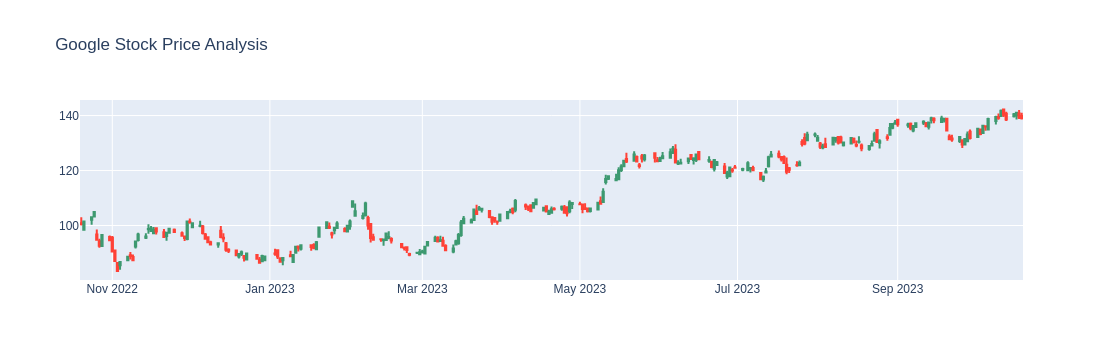

In [22]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

## Bar Plot

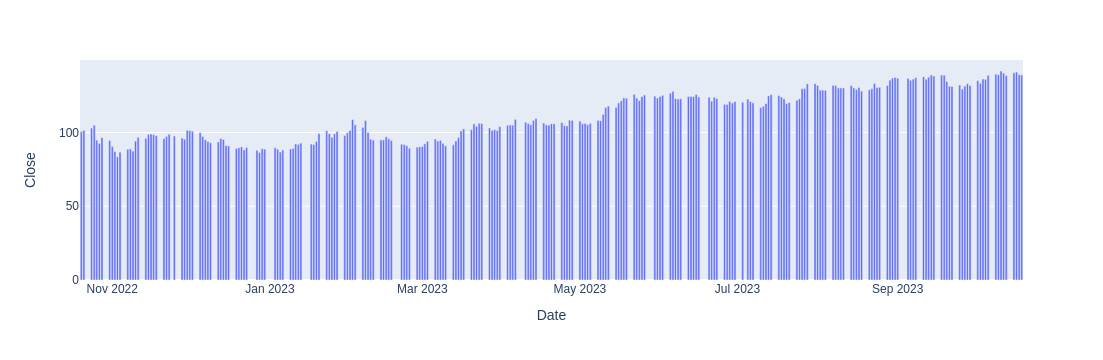

In [23]:
figure = px.bar(data, x = "Date", y= "Close") 
# data is Goodle stock data, Date is the time between today and 1 year ago, 
# y is the closing pice on a particular date
# px is the plotly library 
figure.show()

# the figure is a Price v/s Time graph

## Range Slider

/home/snivellus/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



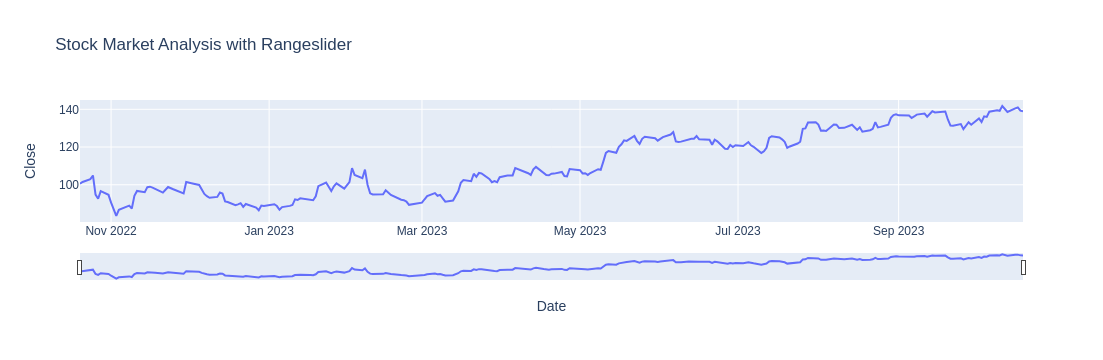

In [24]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

/home/snivellus/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



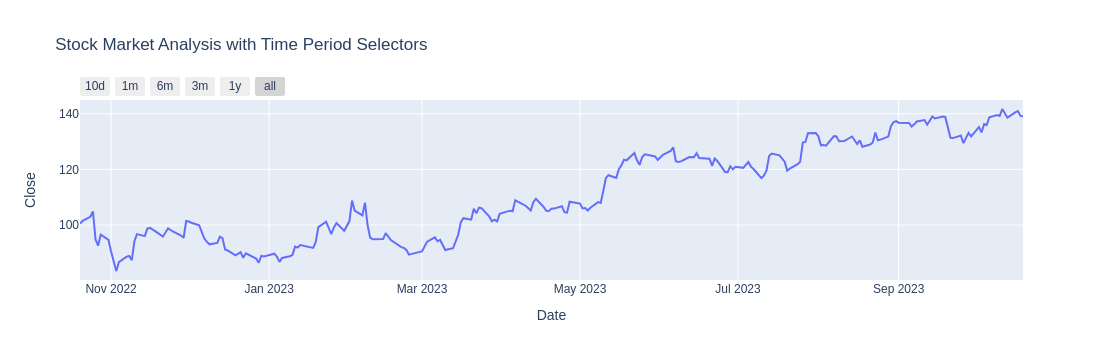

In [25]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            #step is the period in day, month, year
            # count is the number of steps
            # stepmode is counting the steps prior or later than today
            dict(count=10, label="10d", step="day", stepmode="backward"), # today to 10 days prior
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

## Removing the Weekend values in Visualization

/home/snivellus/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



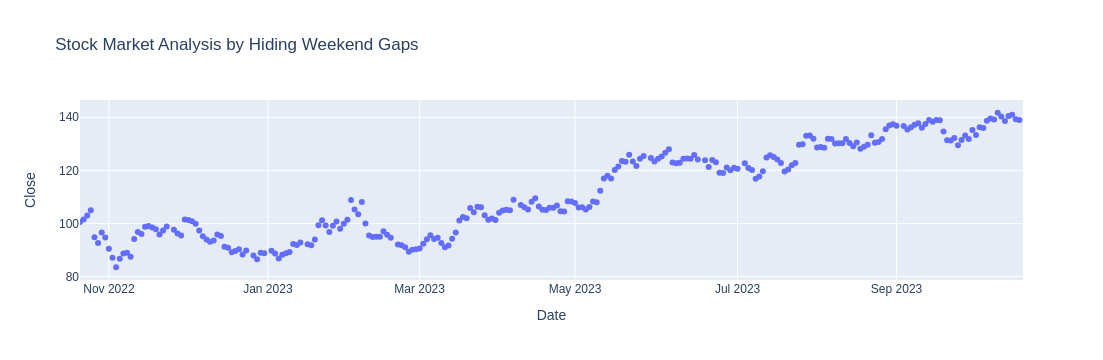

In [26]:
figure = px.scatter(data, x='Date', y='Close', range_x=[start_date, end_date],
                 title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #Note! Bounds are the start and end of the range break with Start INCLUSIVE and end EXCLUSIVE. 
        # Sat is Saturday to be removed and Mon is Monday to be the limit of removal
        # Therefore sat and sun are removed from the dataset.
    ]
)
figure.show()

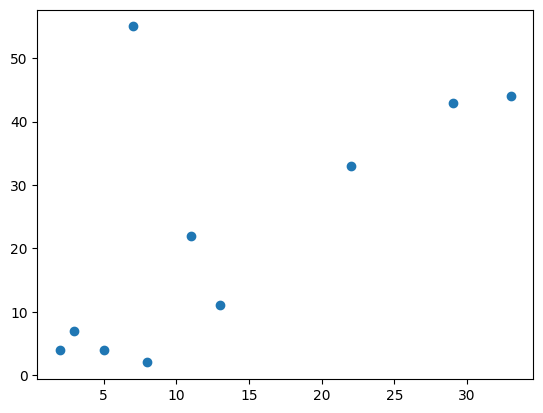

In [28]:
import matplotlib.pyplot as plt
# X axis values:
x = [2,3,7,29,8,5,13,11,22,33]
# Y axis values:
y = [4,7,55,43,2,4,11,22,33,44]
# Create scatter plot:
plt.scatter(x, y)
plt.show()